## Stock Prediction using LSTM (Long Short Term Memory)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential # Using the keras model to form the LSTM architecture 
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler # for normalizing the values so that training becomes faster and more efficient
from sklearn.metrics import mean_squared_error # to check the predicted output with the actual output
from keras.layers.core import Dense, Activation, Dropout
import time #helper libraries
input_file=r"C:\Users\RACHIT\Desktop\Computer_Vision\LSTM\LSTM_RNN_Tutorials_with_Demo-master\StockPricesPredictionProject\DIS.csv"

Using TensorFlow backend.


## Reading the Stock Price datasheet containing 7 columns(open price,close price,Turnover etc) but since we are doing sequence prediction so we only need close price (column 5)

In [3]:
df=pd.read_csv(r"C:\Users\RACHIT\Desktop\Computer_Vision\LSTM\LSTM_RNN_Tutorials_with_Demo-master\StockPricesPredictionProject\DIS.csv",header=None,index_col=None, delimiter=',')
print(df.head())
df=df[0:1500]
all_y = df[5].values
print(all_y[0:5]) # We need only the close price column for our project
dataset=all_y.reshape(-1, 1) # Reshaping it to 1 column and its corresponding number of rows
print(dataset[0:5])

            0          1          2          3          4          5        6
0  1996-12-31  23.011177  23.175543  22.805719  22.928993  17.804647  2719200
1  1997-01-02  22.928993  22.970085  21.942801  22.148258  17.198397  8115400
2  1997-01-03  22.394806  22.805719  22.394806  22.764629  17.677013  4650000
3  1997-01-06  22.764629  22.928993  22.559172  22.682446  17.613201  3623300
4  1997-01-07  22.682446  22.682446  22.435898  22.641354  17.581289  3606200
[17.804647 17.198397 17.677013 17.613201 17.581289]
[[17.804647]
 [17.198397]
 [17.677013]
 [17.613201]
 [17.581289]]


## Normalizing the close price column values using MinMaxScaler  function for smooth and faster training of the LSTM model

In [194]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset[0:10]

array([[0.29365841],
       [0.2675478 ],
       [0.28816134],
       [0.28541302],
       [0.2840386 ],
       [0.27423841],
       [0.27010908],
       [0.27423841],
       [0.27561477],
       [0.28937938]])

## Splitting the dataset into training and testing set (50% training and 50% testing set)

In [15]:
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
train[0:5]

array([[17.804647],
       [17.198397],
       [17.677013],
       [17.613201],
       [17.581289]])

## For LSTM , suppose there are n values in column so first n-1 values will go in the training set and the n(th) value will go in the testing set. Actually it depends upon the sliding window(in this case loop_back variable) , how much value we should keep in the training set out of n values

In [16]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)
print(trainY.shape)
print('Training input value')
print(trainX[0:3])
print('Training output value')
print(trainY[0:3])

(744, 5)
(744,)
Training input value
[[17.804647 17.198397 17.677013 17.613201 17.581289]
 [17.198397 17.677013 17.613201 17.581289 17.353743]
 [17.677013 17.613201 17.581289 17.353743 17.257866]]
Training output value
[17.353743 17.257866 17.353743]


In [18]:
print(trainX.shape)
trainX[0:2]

(744, 5)


array([[17.804647, 17.198397, 17.677013, 17.613201, 17.581289],
       [17.198397, 17.677013, 17.613201, 17.581289, 17.353743]])

## One of the unique property of LSTM model is that it takes 3 parameters as input. The parameters are batch size, time-steps and features.
## An example to explain the above parameters fitting is suppose you have 10 videos of 20 seconds each and each video has 15 frames each of 24*24 pixels.
## So batch-size is 20, timesteps is 15 and features is (24*24)

In [19]:

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape)
trainX[0:2]

(744, 1, 5)


array([[[17.804647, 17.198397, 17.677013, 17.613201, 17.581289]],

       [[17.198397, 17.677013, 17.613201, 17.581289, 17.353743]]])

## Creating the neural network for training our model. 
### So first we have the LSTM model with 25 neurons in the layer
### Then we introduced Dropout layer to avoid overfitting
### Then we have the final output layer of 1 neuron to predict the next close price value
### The loss function used is mean squared error and optimizer is adam optimizer
### Finally fitting the model with batch size of 240 and epoch value 20. Verbose parameter tells the log activity of the model

In [201]:
model = Sequential()
model.add(LSTM(25, input_shape=(1, look_back)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history=model.fit(trainX, trainY, epochs=20, batch_size=240, verbose=1)

Epoch 1/20
744/744 [==============================] - 1s 2ms/step - loss: 0.2384
Epoch 2/20
744/744 [==============================] - 0s 13us/step - loss: 0.2088
Epoch 3/20
744/744 [==============================] - 0s 18us/step - loss: 0.1814
Epoch 4/20
744/744 [==============================] - 0s 15us/step - loss: 0.1586
Epoch 5/20
744/744 [==============================] - 0s 17us/step - loss: 0.1355
Epoch 6/20
744/744 [==============================] - 0s 14us/step - loss: 0.1136
Epoch 7/20
744/744 [==============================] - 0s 20us/step - loss: 0.0944
Epoch 8/20
744/744 [==============================] - 0s 20us/step - loss: 0.0785
Epoch 9/20
744/744 [==============================] - 0s 15us/step - loss: 0.0637
Epoch 10/20
744/744 [==============================] - 0s 18us/step - loss: 0.0503
Epoch 11/20
744/744 [==============================] - 0s 19us/step - loss: 0.0396
Epoch 12/20
744/744 [==============================] - 0s 15us/step - loss: 0.0314
Epoch 13/20
74

## Plotting the predicted values in red color and the actual values in blue color

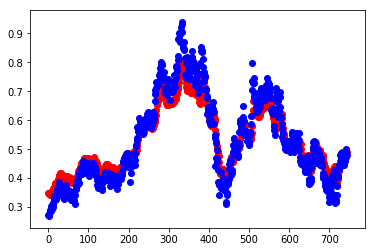

In [202]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
plt.scatter(range(0,744),trainPredict,c='r')
plt.scatter(range(744),trainY,c='b')

## Now lets check for an arbitrary input test value , so in the testing variable I have input the testing value and the model gives the correspoding predicted value

In [203]:
testing=[0.29365841, 0.2675478 , 0.28816134, 0.28541302, 0.2840386]
j=np.reshape(testing,(1,1,5))
model.predict(j)

array([[0.3480485]], dtype=float32)

In [204]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

In [205]:
print(trainPredict.shape)
#trainY=trainY.transpose

(744, 1)


In [208]:
trainY.shape

(1, 744)

In [209]:
sto=trainY.reshape(-1,1)

In [215]:
print(sto[0:5])

[[17.353743]
 [17.257866]
 [17.353743]
 [17.3857  ]
 [17.705294]]


In [217]:
print(trainPredict[0:5])

[[19.067505]
 [19.051138]
 [19.056313]
 [19.010092]
 [18.95407 ]]


## To calculate the model loss , I have used MSE(mean squared error) function , So I have got a MSE of 1.17 which is quite decent

In [219]:
trainScore = math.sqrt(mean_squared_error(sto[:,:], trainPredict[:,:]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 1.17 RMSE


In [227]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
trainPredictPlot[0:20]

array([[        nan],
       [        nan],
       [        nan],
       [        nan],
       [        nan],
       [19.06750488],
       [19.05113792],
       [19.05631256],
       [19.01009178],
       [18.95406914],
       [18.97103119],
       [19.00866127],
       [19.06738853],
       [19.17241478],
       [19.23798943],
       [19.25028992],
       [19.34689522],
       [19.38678169],
       [19.42702484],
       [19.47737312]])

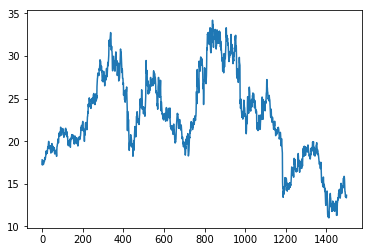

In [230]:
plt.plot(scaler.inverse_transform(dataset))

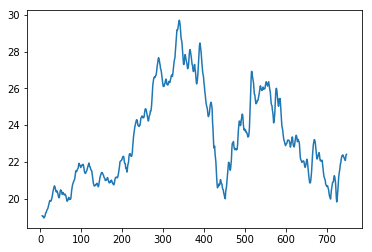

In [231]:
plt.plot(trainPredictPlot)

In [236]:
df = pd.DataFrame(data={"prediction": np.around(list(testPredict.reshape(-1)), decimals=2)})